<a href="https://colab.research.google.com/github/Daryna-Ruban/Machine-learning/blob/main/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%9B%D0%912_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1.
Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
Провести попередній аналіз даних, а саме:



1. Вивести перших 5 рядків.

In [ ]:
import pandas as pd
# Завантажимо таблицю з Вікіпедії
url ="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html (url)
df = tables [2] # Таблиця, що містить дані про ВвП
# Відображення перших рядків таблиці для перевірки
df. head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

2. Визначити розмір датасета.

In [ ]:
# Визначення розміру датасету
dataset_size = df.shape

print(f"Розмір датасету: {dataset_size[0]} рядків і {dataset_size[1]} стовпців")

Розмір датасету: 210 рядків і 7 стовпців


3. Визначити оптимальну кількість стовпців.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

df = pd.read_html(StringIO(str(BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)").text, 'html.parser').find('table', {'class': 'wikitable'}))))[0]
num_columns = df.shape[1]
print(f"Кількість стовпців: {num_columns}\nКількість стовпців оптимальна." if num_columns <= 10 else "Кількість стовпців не оптимальна")

Кількість стовпців: 7
Кількість стовпців оптимальна.


4. Змінити назви стовпців на більш зручні

In [ ]:
import pandas as pd

df = pd.read_html(StringIO(str(BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)").text, 'html.parser').find('table', {'class': 'wikitable'}))))[0]
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()
print(df.head())

# Перевірка результату - відобразимо перші кілька рядків у гарному форматі
print("Оновлені дані:\n")
print(tabulate(df.head(10), headers='keys', tablefmt='grid'))


Кількість пропущених значень у кожному стовпці:
 Country/Territory   Country/Territory     0
IMF[1][13]          Forecast             15
                    Year                 15
World Bank[14]      Estimate              8
                    Year                  8
United Nations[15]  Estimate              1
                    Year                  1
dtype: int64
Оновлені дані:

+----+----------------------------------------------+------------------------------+--------------------------+----------------------------------+------------------------------+--------------------------------------+----------------------------------+
|    | ('Country/Territory', 'Country/Territory')   |   ('IMF[1][13]', 'Forecast') | ('IMF[1][13]', 'Year')   |   ('World Bank[14]', 'Estimate') | ('World Bank[14]', 'Year')   |   ('United Nations[15]', 'Estimate') | ('United Nations[15]', 'Year')   |
+====+==============================================+==============================+==========================

5. Визначити тип даних.

In [ ]:
# Визначення типів даних
data_types = df.dtypes

print("\nТипи даних у датасеті:")
print(data_types)


Типи даних у датасеті:
Country/Territory   Country/Territory    object
IMF[1][13]          Forecast             object
                    Year                 object
World Bank[14]      Estimate             object
                    Year                 object
United Nations[15]  Estimate             object
                    Year                 object
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення

In [ ]:
import pandas as pd

df.replace('—', float('NaN'), inplace=True)
df.isnull().sum()

Country/Territory   Country/Territory     0
IMF[1][13]          Forecast             15
                    Year                 15
World Bank[14]      Estimate              8
                    Year                  8
United Nations[15]  Estimate              1
                    Year                  1
dtype: int64

7. Ще раз перевірити наявність пропущених значень.

In [ ]:
import pandas as pd
print(df.isna().sum())

Country/Territory   Country/Territory     0
IMF[1][13]          Forecast             15
                    Year                 15
World Bank[14]      Estimate              8
                    Year                  8
United Nations[15]  Estimate              1
                    Year                  1
dtype: int64


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [ ]:
import pandas as pd
from tabulate import tabulate

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]

дублікати = df.duplicated()
кількість_дублікатів = дублікати.sum()
print(f"Кількість дублікатів: {кількість_дублікатів}")

df_cleaned = df.drop_duplicates()
print(tabulate(df.head(10), headers='keys', tablefmt='grid'))

Кількість дублікатів: 0
+----+----------------------------------------------+------------------------------+--------------------------+----------------------------------+------------------------------+--------------------------------------+----------------------------------+
|    | ('Country/Territory', 'Country/Territory')   |   ('IMF[1][13]', 'Forecast') | ('IMF[1][13]', 'Year')   |   ('World Bank[14]', 'Estimate') | ('World Bank[14]', 'Year')   |   ('United Nations[15]', 'Estimate') | ('United Nations[15]', 'Year')   |
+====+==============================================+==============================+==========================+==================================+==============================+======================================+==================================+
|  0 | World                                        |                    109529216 | 2024                     |                        105435540 | 2023                         |                            100834796 | 202

9. Вивести описову статистику датасету describe()


In [ ]:
print("\nОписова статистика:\n")
print(tabulate(df.describe(), headers='keys', tablefmt='grid'))


Описова статистика:

+--------+----------------------------------------------+------------------------------+--------------------------+----------------------------------+------------------------------+--------------------------------------+----------------------------------+
|        | ('Country/Territory', 'Country/Territory')   | ('IMF[1][13]', 'Forecast')   |   ('IMF[1][13]', 'Year') | ('World Bank[14]', 'Estimate')   |   ('World Bank[14]', 'Year') |   ('United Nations[15]', 'Estimate') |   ('United Nations[15]', 'Year') |
+========+==============================================+==============================+==========================+==================================+==============================+======================================+==================================+
| count  | 210                                          | 210                          |                      210 | 210                              |                          210 |                        210  

10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [ ]:
import pandas as pd
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]
df.columns = ['Country', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']

# Конвертація значень у числові типи
df['IMF_Forecast'] = pd.to_numeric(df['IMF_Forecast'], errors='coerce')
df['WorldBank_Estimate'] = pd.to_numeric(df['WorldBank_Estimate'], errors='coerce')

# Обчислення різниці між прогнозом МВФ (IMF) та оцінкою Світового банку (World Bank)
df['Difference'] = df['IMF_Forecast'] - df['WorldBank_Estimate']

# Виведення таблиці з обчисленими відхиленнями
print("\nТаблиця з відхиленнями між прогнозом МВФ (IMF) та оцінкою Світового банку (World Bank):\n")
print(df[['Country', 'IMF_Forecast', 'WorldBank_Estimate', 'Difference']].head(10))

# Знаходження країни з найбільшим відхиленням
max_diff_country = df.loc[df['Difference'].abs().idxmax()][['Country', 'Difference']]
print("\nКраїна з найбільшим відхиленням:\n", max_diff_country)




Таблиця з відхиленнями між прогнозом МВФ (IMF) та оцінкою Світового банку (World Bank):

          Country  IMF_Forecast  WorldBank_Estimate  Difference
0           World   109529216.0         105435540.0   4093676.0
1   United States    28781083.0          27360935.0   1420148.0
2           China    18532633.0          17794782.0    737851.0
3         Germany     4591100.0           4456081.0    135019.0
4           Japan     4110452.0           4212945.0   -102493.0
5           India     3937011.0           3549919.0    387092.0
6  United Kingdom     3495261.0           3340032.0    155229.0
7          France     3130014.0           3030904.0     99110.0
8          Brazil     2331391.0           2173666.0    157725.0
9           Italy     2328028.0           2254851.0     73177.0

Країна з найбільшим відхиленням:
 Country           World
Difference    4093676.0
Name: 0, dtype: object


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [ ]:
import pandas as pd
import numpy as np

# Завантаження таблиці з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]

df.columns = ['Country', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']

df['IMF_Forecast'] = pd.to_numeric(df['IMF_Forecast'], errors='coerce')
df['WorldBank_Estimate'] = pd.to_numeric(df['WorldBank_Estimate'], errors='coerce')
df['UN_Estimate'] = pd.to_numeric(df['UN_Estimate'], errors='coerce')

# Обчислення кореляції між показниками МВФ, Світового банку та ООН
correlation_matrix = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].corr()

print("\nКореляційна матриця між показниками МВФ, Світового банку та ООН:\n")
print(correlation_matrix)

# Знаходження пари змінних з найвищою кореляцією
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Виключаємо самокореляцію (кореляцію показника з собою)
highest_corr_pair = max_corr.idxmax()

print("\nПара змінних з найвищою кореляцією:\n", highest_corr_pair)
print("Кореляція між ними:", max_corr.max())



Кореляційна матриця між показниками МВФ, Світового банку та ООН:

                    IMF_Forecast  WorldBank_Estimate  UN_Estimate
IMF_Forecast            1.000000            0.999987     0.999902
WorldBank_Estimate      0.999987            1.000000     0.999932
UN_Estimate             0.999902            0.999932     1.000000

Пара змінних з найвищою кореляцією:
 ('IMF_Forecast', 'WorldBank_Estimate')
Кореляція між ними: 0.9999871766485534


12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?


In [ ]:
# Обчислення середнього значення для кожного стовпця
mean_values = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].mean()
print("\nСереднє значення для кожного стовпця:\n", mean_values)

# Аналіз зміни середніх значень між роками
mean_diff_imf_worldbank = mean_values['IMF_Forecast'] - mean_values['WorldBank_Estimate']
mean_diff_worldbank_un = mean_values['WorldBank_Estimate'] - mean_values['UN_Estimate']
mean_diff_imf_un = mean_values['IMF_Forecast'] - mean_values['UN_Estimate']

print("\nЗміна середнього значення між роками:")
print("МВФ і Світовий банк:", mean_diff_imf_worldbank)
print("Світовий банк і ООН:", mean_diff_worldbank_un)
print("МВФ і ООН:", mean_diff_imf_un)




Середнє значення для кожного стовпця:
 IMF_Forecast          1.123228e+06
WorldBank_Estimate    1.037206e+06
UN_Estimate           9.612699e+05
dtype: float64

Зміна середнього значення між роками:
МВФ і Світовий банк: 86021.5188626555
Світовий банк і ООН: 75936.31185750151
МВФ і ООН: 161957.830720157


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [ ]:
# Обчислення стандартного відхилення показників для кожної країни
df['Std_Dev'] = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].std(axis=1)
country_highest_variability = df.loc[df['Std_Dev'].idxmax()][['Country', 'Std_Dev']]

print("\nКраїна з найвищою варіативністю в показниках між роками:\n", country_highest_variability)



Країна з найвищою варіативністю в показниках між роками:
 Country             World
Std_Dev    4349673.698162
Name: 0, dtype: object


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [ ]:
# Визначення країни з найвищим та найнижчим показниками
max_imf_country = df.loc[df['IMF_Forecast'].idxmax()]['Country']
min_imf_country = df.loc[df['IMF_Forecast'].idxmin()]['Country']

max_worldbank_country = df.loc[df['WorldBank_Estimate'].idxmax()]['Country']
min_worldbank_country = df.loc[df['WorldBank_Estimate'].idxmin()]['Country']

max_un_country = df.loc[df['UN_Estimate'].idxmax()]['Country']
min_un_country = df.loc[df['UN_Estimate'].idxmin()]['Country']

print("\nКраїни з найвищими та найнижчими показниками у кожному з років:")
print("МВФ 2024: Найвищий показник -", max_imf_country, ", Найнижчий показник -", min_imf_country)
print("Світовий банк 2023: Найвищий показник -", max_worldbank_country, ", Найнижчий показник -", min_worldbank_country)
print("ООН 2022: Найвищий показник -", max_un_country, ", Найнижчий показник -", min_un_country)


Країни з найвищими та найнижчими показниками у кожному з років:
МВФ 2024: Найвищий показник - World , Найнижчий показник - Tuvalu
Світовий банк 2023: Найвищий показник - World , Найнижчий показник - Tuvalu
ООН 2022: Найвищий показник - World , Найнижчий показник - Tuvalu


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

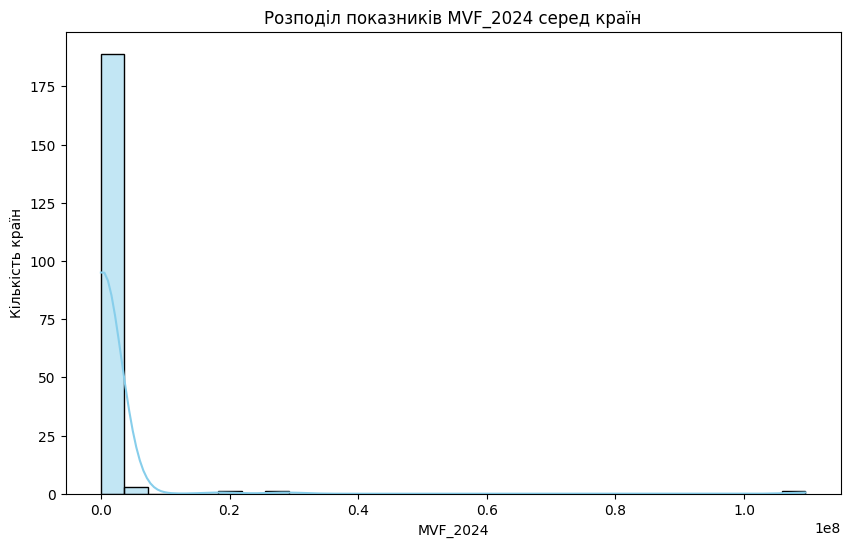

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних з таблиці Вікіпедії
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", attrs={"class": "wikitable"})[0]

# Встановлення назв колонок
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()

# Конвертація значень у числові типи для відповідних колонок
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')

# Видалення пропущених значень
df = df.dropna(subset=['MVF_2024'])

# Побудова гістограми
plt.figure(figsize=(10, 6))
sns.histplot(df['MVF_2024'], bins=30, kde=True, color='skyblue')

# Додавання заголовку та підписів осей
plt.title('Розподіл показників MVF_2024 серед країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')

# Показ графіка
plt.show()


16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [2]:
import pandas as pd

# Завантаження даних з таблиці Вікіпедії
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", attrs={"class": "wikitable"})[0]

# Встановлення назв колонок
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()

# Конвертація значень у числові типи для відповідних колонок
df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')

# Обчислення частки кожної країни в загальному значенні для кожного року
df['MVF_2024_Share'] = df['MVF_2024'] / df['MVF_2024'].sum()
df['WorldBank_2023_Share'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum()
df['OON_2022_Share'] = df['OON_2022'] / df['OON_2022'].sum()

# Виведення часток для кожного року
shares = df[['Country', 'MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']]

print("Для кожного року:")
print(shares.head())

# Зміна часток країн з часом
shares = df.set_index('Country')[['MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']]

print("\nЗміна часток країн з часом:")
print(shares.head())



Для кожного року:
         Country  MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
0          World        0.500066              0.005376        0.503235
1  United States        0.131403              0.005376        0.130591
2          China        0.084613                   NaN        0.084933
3        Germany        0.020961              0.005376        0.021268
4          Japan        0.018767              0.005376        0.020108

Зміна часток країн з часом:
               MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
Country                                                            
World                0.500066              0.005376        0.503235
United States        0.131403              0.005376        0.130591
China                0.084613                   NaN        0.084933
Germany              0.020961              0.005376        0.021268
Japan                0.018767              0.005376        0.020108


17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

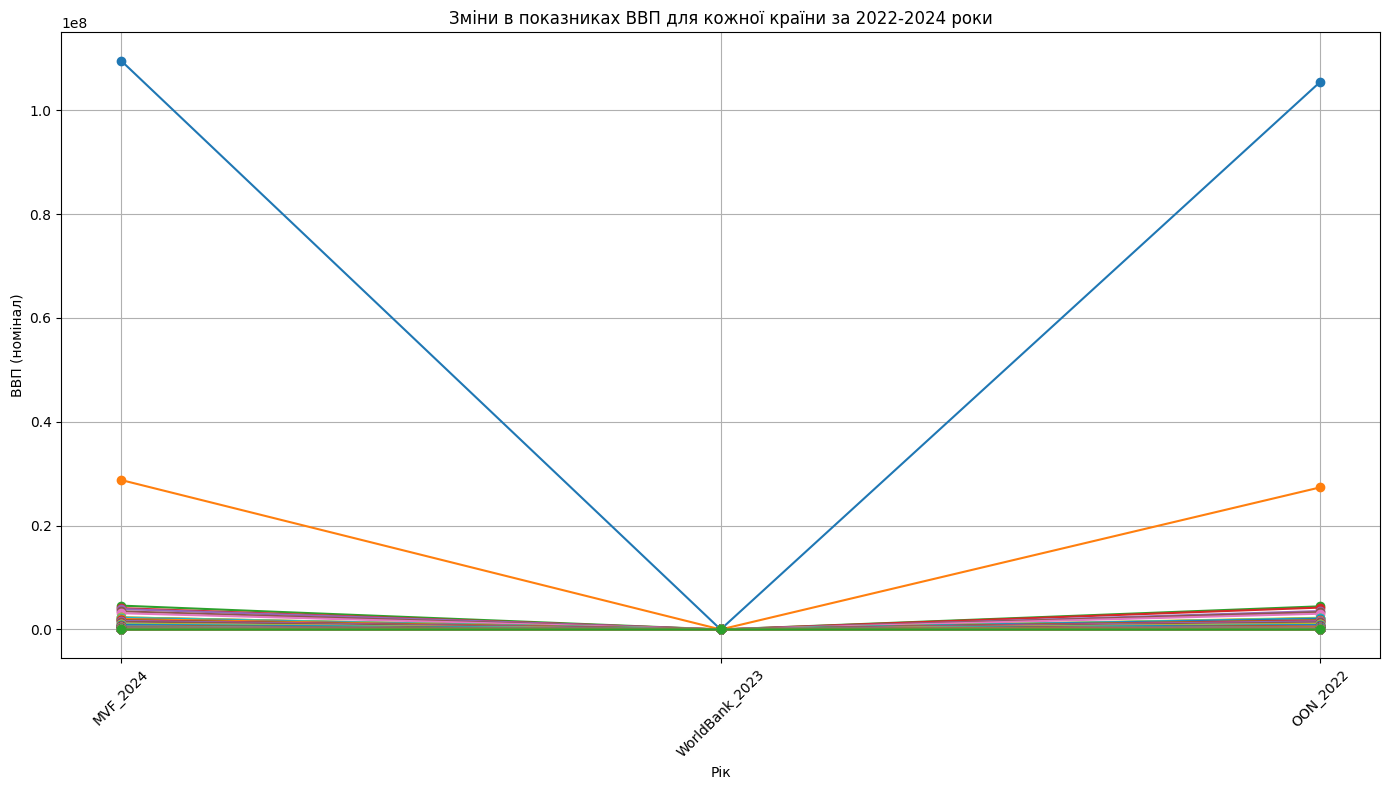

Країни зі стабільним зростанням ВВП:
['Guinea-Bissau', 'San Marino']

Країни зі стабільним спадом ВВП:
['East Timor']


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", attrs={"class": "wikitable"})[0]
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()

df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['MVF_2024', 'WorldBank_2023', 'OON_2022'])

df_melted = df.melt(id_vars=['Country'], value_vars=['MVF_2024', 'WorldBank_2023', 'OON_2022'],
                    var_name='Year', value_name='GDP')

# Створення лінійного графіка для кожної країни
plt.figure(figsize=(14, 8))

for country in df['Country']:
    country_data = df_melted[df_melted['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o', label=country)

plt.title('Зміни в показниках ВВП для кожної країни за 2022-2024 роки')
plt.xlabel('Рік')
plt.ylabel('ВВП (номінал)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# Ідентифікація країн зі стабільним зростанням або спадом
stable_growth = []
stable_decline = []

for index, row in df.iterrows():
    if row['MVF_2024'] > row['WorldBank_2023'] > row['OON_2022']:
        stable_growth.append(row['Country'])
    elif row['MVF_2024'] < row['WorldBank_2023'] < row['OON_2022']:
        stable_decline.append(row['Country'])

print("Країни зі стабільним зростанням ВВП:")
print(stable_growth)

print("\nКраїни зі стабільним спадом ВВП:")
print(stable_decline)

**Висновок:** я згадала, як працювати із даними з таблиці, змогла зробити обчислення стандартного відхилення, часток у світовому ВВП та візуалізації, змогла виявити країни зі стабільним зростанням, спадом. Також відкрила для себе tabulate для поркращення вигляду таблиці

# Завдання 2.
Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.


1. Вивести перших 5 рядків

In [6]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [7]:
с

print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Визначити розмір датасета.

In [8]:
rows, columns = df.shape
print(f"Розмір датасету: {rows} рядків і {columns} стовпців")

Розмір датасету: 418 рядків і 12 стовпців


3. Визначити тип даних

In [9]:
data_types = df.dtypes
print("Тип даних:")
print(data_types)

Тип даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення

In [12]:
import pandas as pd
from tabulate import tabulate


missing_values = df.isnull().sum()


print("\nПропущені значення:")
print(tabulate(missing_values.to_frame(name='Missing Values'), headers='keys', tablefmt='pretty'))

# Заміна пропущених значень на середнє значення для числових колонок
df.fillna(df.mean(numeric_only=True), inplace=True)

# Визначення наявності пропущених значень після заміни
missing_values_after = df.isnull().sum()

print("\nПісля заміни:")
print(tabulate(missing_values_after.to_frame(name='Missing Values After Replacement'), headers='keys', tablefmt='pretty'))


Пропущені значення:
+-------------+----------------+
|             | Missing Values |
+-------------+----------------+
| PassengerId |       0        |
|  Survived   |       0        |
|   Pclass    |       0        |
|    Name     |       0        |
|     Sex     |       0        |
|     Age     |       0        |
|    SibSp    |       0        |
|    Parch    |       0        |
|   Ticket    |       0        |
|    Fare     |       0        |
|    Cabin    |      327       |
|  Embarked   |       0        |
+-------------+----------------+

Після заміни:
+-------------+----------------------------------+
|             | Missing Values After Replacement |
+-------------+----------------------------------+
| PassengerId |                0                 |
|  Survived   |                0                 |
|   Pclass    |                0                 |
|    Name     |                0                 |
|     Sex     |                0                 |
|     Age     |             

5. Ще раз перевірити наявність пропущених значень.


In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()
print(tabulate(missing_values.to_frame(name='Missing Values'), headers='keys', tablefmt='pretty'))

+-------------+----------------+
|             | Missing Values |
+-------------+----------------+
| PassengerId |       0        |
|  Survived   |       0        |
|   Pclass    |       0        |
|    Name     |       0        |
|     Sex     |       0        |
|     Age     |       0        |
|    SibSp    |       0        |
|    Parch    |       0        |
|   Ticket    |       0        |
|    Fare     |       0        |
|    Cabin    |      327       |
|  Embarked   |       0        |
+-------------+----------------+


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [19]:
df.drop_duplicates(inplace=True)
print(f"Дублікати після видалення: {df.duplicated().sum()}")

Дублікати після видалення: 0


7. Вивести описову статистику датасету describe()

In [46]:
import pandas as pd
import seaborn as sns

# Описова статистика
describe_df = df.describe()

# Стилізувати
cmap = sns.light_palette("skyblue", as_cmap=True)
styled_df = describe_df.style.background_gradient(cmap=cmap, axis=1).set_caption("Описова статистика датасету Titanic")
styled_head_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


8. Видалити стовпчик Cabin

In [34]:
df = pd.read_csv('titanic.csv')
df.drop(columns='Cabin', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [35]:
selected_columns = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
selected_columns.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика)

In [36]:
selected_columns = df[['Sex']].copy()
print("Унікальні значення 'Sex':")
selected_columns['Sex'].unique()

selected_columns.loc[:, 'Sex'] = selected_columns['Sex'].map({'male': 1, 'female': 0})
selected_columns.head()

Унікальні значення 'Sex':


,Sex
0,1
1,0
2,1
3,1
4,0


11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає)

In [37]:
selected_columns = df[['Sex']].copy()
selected_columns.loc[:, 'Sex'] = selected_columns['Sex'].map({'male': 1, 'female': 0})
print("Кількість пропущених значень:")
selected_columns.isnull().sum()

Кількість пропущених значень:


,0
Sex,0


12.Вивести 5 перших рядків датасету.

In [49]:
cmap = sns.light_palette("skyblue", as_cmap=True)
styled_head_df = df.head().style.background_gradient(cmap=cmap, axis=1).set_caption("Перші 5 рядків датасету Titanic")
styled_head_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


13.Вивести 5 останніх рядків датасету.

In [57]:
cmap = sns.light_palette("skyblue", as_cmap=True)
styled_head_df = df.tail().style.background_gradient(cmap=cmap, axis=1).set_caption("Останні 5 рядків датасету Titanic")
styled_head_df

Кількість пропущених значень:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",nan,30.272590,0,0,A.5. 3236,8.050000,nan,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",nan,39.000000,0,0,PC 17758,108.900000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",nan,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,nan,S
416,1308,0,3,"Ware, Mr. Frederick",nan,30.272590,0,0,359309,8.050000,nan,S
417,1309,0,3,"Peter, Master. Michael J",nan,30.272590,1,1,2668,22.358300,nan,C


14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?

In [58]:
df = pd.read_csv('titanic.csv')
print("Sex:")
print(df['Sex'].unique())

if 'Sex' in df.columns and 'Survived' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    survival_rate = df.groupby('Sex')['Survived'].mean() * 100
    print("Відсоток виживання:")
    print(survival_rate)


Sex:
['male' 'female']
Відсоток виживання:
Sex
0    100.0
1      0.0
Name: Survived, dtype: float64


15.Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?


In [60]:

if 'Pclass' in df.columns and 'Survived' in df.columns:
    survival_rate_per_class = df.groupby('Pclass')['Survived'].mean() * 100

    # Виведення результатів
    print("Відсоток виживання для кожного класу:")
    for pclass, rate in survival_rate_per_class.items():
        print(f"Клас {pclass}: {rate:.2f}%")

    # Визначення класу з найвищим рівнем виживання
    highest_survival_class = survival_rate_per_class.idxmax()
    print(f"\nКлас з найвищим рівнем виживання: {highest_survival_class}")
else:
    print("Необхідні стовпці 'Pclass' і 'Survived' відсутні в даних.")


Відсоток виживання для кожного класу:
Клас 1: 46.73%
Клас 2: 32.26%
Клас 3: 33.03%

Клас з найвищим рівнем виживання: 1


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?

In [63]:
if 'Survived' in df.columns and 'Age' in df.columns:

    df_filtered = df.dropna(subset=['Age'])

    average_age = df_filtered.groupby('Survived')['Age'].mean()

    print("Середній вік:")
    print(f"Ті, хто вижив: {average_age[1]:.2f} років")
    print(f"Ті, хто не вижив: {average_age[0]:.2f} років")

    if average_age[1] < average_age[0]:
        print("\nМолодші мали вищий рівень виживання.")
    else:
        print("\nВік не мав значного впливу на виживання.")
else:
    print("Необхідні стовпці 'Survived' і 'Age' відсутні в даних.")

Середній вік:
Ті, хто вижив: 30.27 років
Ті, хто не вижив: 30.27 років

Молодші мали вищий рівень виживання.


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?


In [64]:
if 'Fare' in df.columns and 'Survived' in df.columns:

    fare_bins = [0, 7.91, 14.45, 31.0, df['Fare'].max()]
    fare_labels = ['Low', 'Medium', 'High', 'Very High']
    df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)


    survival_rate_per_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


    print("Рівень виживання для кожної групи за тарифами:")
    for group, rate in survival_rate_per_fare_group.items():
        print(f"{group}: {rate:.2f}%")


    print("\nВисновок:")
    if survival_rate_per_fare_group['Very High'] > survival_rate_per_fare_group['Low']:
        print("Пасажири з вищими тарифами мали більші шанси на виживання.")
    else:
        print("Тариф не мав значного впливу на шанси виживання.")
else:
    print("Необхідні стовпці 'Fare' і 'Survived' відсутні в даних.")

Рівень виживання для кожної групи за тарифами:
Low: 26.79%
Medium: 26.88%
High: 41.18%
Very High: 50.93%

Висновок:
Пасажири з вищими тарифами мали більші шанси на виживання.


<ipython-input-64-58254423a3a6>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_per_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [66]:
if 'Pclass' in df.columns and 'Fare' in df.columns:

    average_fare_per_class = df.groupby('Pclass')['Fare'].mean()

    print("Середній тариф для кожного класу:")
    for pclass, fare in average_fare_per_class.items():
        print(f"Клас {pclass}: {fare:.2f} одиниць валюти")

    # Аналіз різниці у тарифах між класами
    print("\nВисновок:")
    if average_fare_per_class[1] > average_fare_per_class[2] > average_fare_per_class[3]:
        print("Існує значна різниця у тарифах між класами: тарифи значно вищі у вищих класах.")
    else:
        print("Різниця у тарифах між класами не є суттєвою.")
else:
    print("Необхідні стовпці 'Pclass' і 'Fare' відсутні в даних.")

Середній тариф для кожного класу:
Клас 1: 94.28 одиниць валюти
Клас 2: 22.20 одиниць валюти
Клас 3: 12.46 одиниць валюти

Висновок:
Існує значна різниця у тарифах між класами: тарифи значно вищі у вищих класах.


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [68]:
if 'Pclass' in df.columns and 'Age' in df.columns:
    # Виключення рядків з відсутніми значеннями у стовпці 'Age'
    df_filtered = df.dropna(subset=['Age'])

    # Обчислення середнього віку для кожного класу
    average_age_per_class = df_filtered.groupby('Pclass')['Age'].mean()

    # Виведення результатів
    print("Середній вік пасажирів для кожного класу:")
    for pclass, age in average_age_per_class.items():
        print(f"Клас {pclass}: {age:.2f} років")

    # Аналіз розподілу віку за класами
    print("\nВисновок:")
    if average_age_per_class[1] > average_age_per_class[2] > average_age_per_class[3]:
        print("Пасажири першого класу в середньому були старшими, а пасажири третього класу молодшими.")
    else:
        print("Середній вік пасажирів незначно відрізняється між класами.")
else:
    print("Необхідні стовпці 'Pclass' і 'Age' відсутні в даних.")

Середній вік пасажирів для кожного класу:
Клас 1: 40.92 років
Клас 2: 28.78 років
Клас 3: 24.03 років

Висновок:
Пасажири першого класу в середньому були старшими, а пасажири третього класу молодшими.


20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?

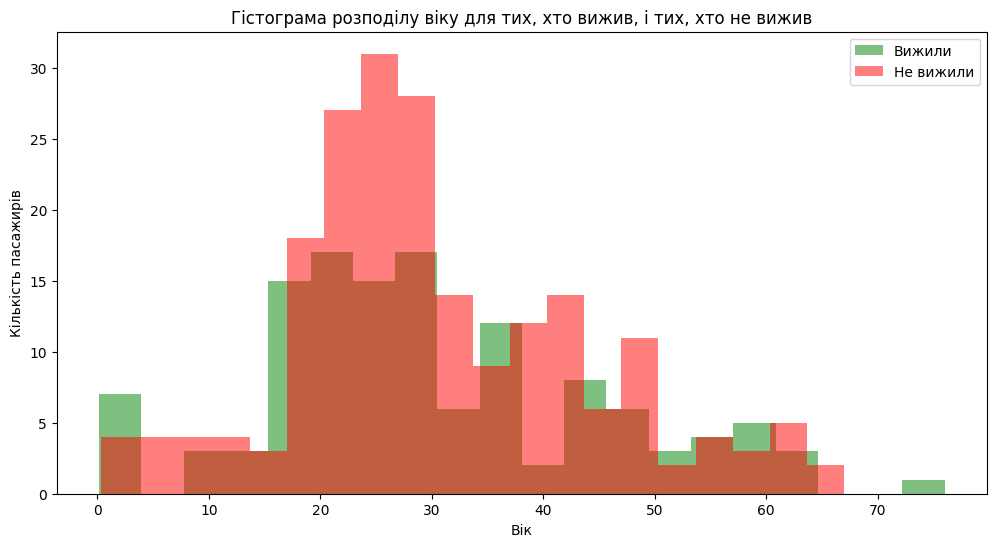


Висновок:
На гістограмі видно, що молодші пасажири мали трохи кращі шанси на виживання, особливо діти.
Також видно, що пасажири середнього віку, які не вижили, були представлені в більшій кількості, ніж ті, що вижили.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt


if 'Survived' in df.columns and 'Age' in df.columns:
    df_filtered = df.dropna(subset=['Age'])

    plt.figure(figsize=(12, 6))

    plt.hist(df_filtered[df_filtered['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Вижили', color='green')
    plt.hist(df_filtered[df_filtered['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Не вижили', color='red')

    plt.title('Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив')
    plt.xlabel('Вік')
    plt.ylabel('Кількість пасажирів')
    plt.legend()

    plt.show()

    print("\nВисновок:")
    print("На гістограмі видно, що молодші пасажири мали трохи кращі шанси на виживання, особливо діти.")
    print("Також видно, що пасажири середнього віку, які не вижили, були представлені в більшій кількості, ніж ті, що вижили.")
else:
    print("Необхідні стовпці 'Survived' і 'Age' відсутні в даних.")


21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [70]:
if 'Pclass' in df.columns and 'Sex' in df.columns and 'Survived' in df.columns:
    survival_rate_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

    print("Відсоток виживання для кожної комбінації статі та класу:")
    for (sex, pclass), rate in survival_rate_by_sex_class.items():
        print(f"{sex.capitalize()} у класі {pclass}: {rate:.2f}%")

    highest_survival_group = survival_rate_by_sex_class.idxmax()
    highest_survival_rate = survival_rate_by_sex_class.max()
    print(f"\nГрупа з найвищим рівнем виживання: {highest_survival_group[0].capitalize()} у класі {highest_survival_group[1]} з рівнем виживання {highest_survival_rate:.2f}%")
else:
    print("Необхідні стовпці 'Pclass', 'Sex', і 'Survived' відсутні в даних.")


Відсоток виживання для кожної комбінації статі та класу:
Female у класі 1: 100.00%
Female у класі 2: 100.00%
Female у класі 3: 100.00%
Male у класі 1: 0.00%
Male у класі 2: 0.00%
Male у класі 3: 0.00%

Група з найвищим рівнем виживання: Female у класі 1 з рівнем виживання 100.00%


22.Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [71]:
# Обчислення кореляції між числовими змінними
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Виведення кореляційної матриці
print("Кореляція між змінними:")
print(correlation)

# Виведення кореляції з виживанням
print("\nКореляція з виживанням:")
print(correlation['Survived'])


Кореляція між змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Кореляція з виживанням:
Survived    1.000000
Pclass     -0.108615
Age        -0.000011
Fare        0.191382
Name: Survived, dtype: float64


**Висновок:** навчилася працювати із датасетами, також було визначено, що аналіз кореляцій показує, що клас подорожі (Pclass) і вартість квитка (Fare) мають більш суттєвий вплив на виживання пасажирів, ніж вік (Age). Виживання більше залежить від соціально-економічного статусу пасажира, ніж від його віку.